In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, colormaps
import ipywidgets

In [4]:
# Give initial parameters to generate the probe
pixel_size = 0.1 # All units are in angstroms for computational simulations
im_shape = (512,512) # Pixel array size
probe_mrads = 20 # Max alpha
wavl = 0.02 # Wavelength (angstroms) Corresponds to ~300keV


In [5]:
# Make the coordinates
# Coordinates
kx = np.fft.fftfreq(im_shape[0], pixel_size) # Creates a frequency array scaled to the inverse of the real value passed
ky = np.fft.fftfreq(im_shape[1], pixel_size) # Creates a frequency array scaled to the inverse of the real value passed
kr2 = kx[:,None]**2+ky[None,:]**2
kr = kr2**0.5

# Probe
k_max = probe_mrads/1000/wavl
# Psi0 = kr < k_max
Psi0 = np.clip((k_max-kr)/(kx[1]-kx[0])+0.5,0,1)


psi0 = np.fft.ifft2(Psi0)
# defocus = 
print(k_max)

1.0


In [ ]:
def genMaskF(shape,f):
    x = np.arange(shape[0])
    y = np.arange(shape[1])
    
    
    # Create Mask
    return np.logical_and(
        np.mod(x[:,None],f) == 0,
        np.mod(y[None,:],f) == 0,
    )

Text(0.5, 0, 'x (arb units)')

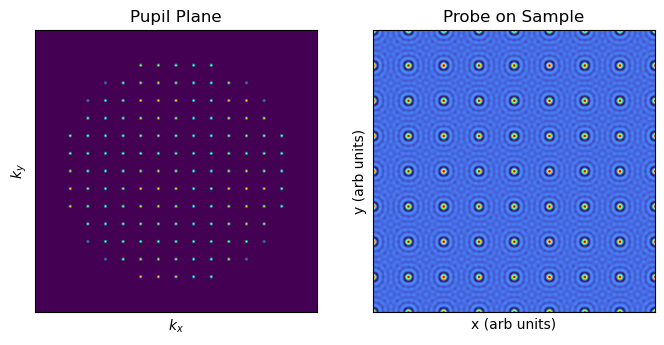

In [ ]:
f = 8
Psi0downsampled = genMaskF(np.shape(Psi0),f)*Psi0

fig, ax = plt.subplots(1,2) 
fig.set_size_inches(8,6)
ax1,ax2 = ax
ax1.imshow(np.fft.ifftshift(Psi0downsampled))
ax1.set_title(f"Pupil Plane")
ax1.set_ylabel("$k_{y}$")
ax1.set_xlabel("$k_{x}$")
ax1.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
ax1.set_xlim((512/2-64,512/2+64))
ax1.set_ylim((512/2-64,512/2+64))


ax2.clear()
ax2.imshow(np.real(np.fft.ifftshift(np.fft.ifft2(Psi0downsampled))), cmap='turbo')
ax2.set_title(f"Probe on Sample")
ax2.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
ax2.set_ylabel("y (arb units)")
ax2.set_xlabel("x (arb units)")
# ax2.set_xlim((512/2-64,512/2+64))
# ax2.set_ylim((512/2-64,512/2+64))

# F Sampling Widget

In [ ]:
# Spatial Frequencies Displayed

def wrapper_function(f):
    Psi0downsampled = genMaskF(np.shape(Psi0),f)*Psi0

    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(8,6)
    ax1,ax2 = ax
    ax1.imshow(np.fft.ifftshift(Psi0downsampled))
    ax1.set_title(f"Pupil Plane")
    ax1.set_ylabel("$k_{y}$")
    ax1.set_xlabel("$k_{x}$")
    ax1.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
    ax1.set_xlim((512/2-64,512/2+64))
    ax1.set_ylim((512/2-64,512/2+64))


    ax2.clear()
    ax2.imshow(np.real(np.fft.ifftshift(np.fft.ifft2(Psi0downsampled))), cmap='turbo')
    ax2.set_title(f"Probe on Sample")
    ax2.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
    ax2.set_ylabel("y (arb units)")
    ax2.set_xlabel("x (arb units)")
    # ax2.set_xlim((512/2-64,512/2+64))
    # ax2.set_ylim((512/2-64,512/2+64))
    
    return None

In [11]:
#| label: app:spatial_frequency_widget
# F Sampling Widget

ipywidgets.interact(
    wrapper_function,
    f=(1,16,1)
);

interactive(children=(IntSlider(value=8, description='f', max=16, min=1), Output()), _dom_classes=('widget-int…

interactive(children=(IntSlider(value=8, description='f', max=16, min=1), Output()), _dom_classes=('widget-int…

<class 'function'>
